# Step 1: Problem Definition

## Objective
The goal of this project is to analyze key macroeconomic indicators  such as GDP, unemployment rate, inflation rate, and interest rates  to identify trends, correlations, and their potential impacts on financial markets.

## Scope
- **Indicators**: GDP, Unemployment Rate, Inflation Rate, Interest Rates.
- **Geographical Focus**: United States (can be extended to other countries).
- **Time Period**: Last 10–15 years.
- **Analysis Goals**:
  - Explore historical patterns in each indicator.
  - Identify correlations between economic variables.
  - Forecast future trends using predictive modeling.






In [1]:
# Import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ML libraries
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: f'{x:,.2f}')
sns.set_style('whitegrid')

# Step 2: Data Collection

## Dataset Overview
 **sales transactions dataset** that contains customer, product, and financial details.

### Columns:
1. **Index** – Row number or unique ID for the record.
2. **Date** – Date of the transaction.
3. **Year** – Year of the transaction (extracted from Date).
4. **Month** – Month of the transaction (extracted from Date).
5. **Customer Age** – Age of the customer.
6. **Customer Gender** – Gender of the customer (Male/Female).
7. **Country** – Country where the sale took place.
8. **State** – State/region within the country.
9. **Product Category** – High-level category of the product.
10. **Sub Category** – More specific type of product.
11. **Quantity** – Number of units sold.
12. **Unit Cost** – Cost price per unit.
13. **Unit Price** – Selling price per unit.
14. **Cost** – Total cost = Quantity × Unit Cost.
15. **Revenue** – Total revenue = Quantity × Unit Price.
16. **Column1** – Unnamed/extra column (likely needs removal).




In [2]:
# Step 2: Data Collection

# Load dataset
df = pd.read_csv(r'D:\intership project\Project 2\salesforcourse-4fe2kehu.csv') 


print("Dataset Shape:", df.shape)
df.head()


Dataset Shape: (34867, 16)


,index,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue,Column1
0,0,2/19/2016,"2,016.00",February,29.00,F,United States,Washington,Accessories,Tires and Tubes,1.00,80.00,109.00,80.00,109.00,NaN
1,1,2/20/2016,"2,016.00",February,29.00,F,United States,Washington,Clothing,Gloves,2.00,24.50,28.50,49.00,57.00,NaN
2,2,2/27/2016,"2,016.00",February,29.00,F,United States,Washington,Accessories,Tires and Tubes,3.00,3.67,5.00,11.00,15.00,NaN
3,3,3/12/2016,"2,016.00",March,29.00,F,United States,Washington,Accessories,Tires and Tubes,2.00,87.50,116.50,175.00,233.00,NaN
4,4,3/12/2016,"2,016.00",March,29.00,F,United States,Washington,Accessories,Tires and Tubes,3.00,35.00,41.67,105.00,125.00,NaN


In [4]:
print("Dataset Shape:", df.shape)

Dataset Shape: (34867, 14)


In [5]:
# Column names
print("\nColumn Names:", df.columns.tolist())


Column Names: ['Date', 'Year', 'Month', 'Customer Age', 'Customer Gender', 'Country', 'State', 'Product Category', 'Sub Category', 'Quantity', 'Unit Cost', 'Unit Price', 'Cost', 'Revenue']


In [6]:
# Data types and missing values
print("\nData Info:")
print(df.info())


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34867 entries, 0 to 34866
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              34866 non-null  datetime64[ns]
 1   Year              34866 non-null  float64       
 2   Month             34866 non-null  object        
 3   Customer Age      34866 non-null  float64       
 4   Customer Gender   34866 non-null  object        
 5   Country           34866 non-null  object        
 6   State             34866 non-null  object        
 7   Product Category  34866 non-null  object        
 8   Sub Category      34866 non-null  object        
 9   Quantity          34866 non-null  float64       
 10  Unit Cost         34866 non-null  float64       
 11  Unit Price        34866 non-null  float64       
 12  Cost              34866 non-null  float64       
 13  Revenue           34867 non-null  float64       
dtypes: datetim

In [7]:
print("\nStatistical Summary:")
print(df.describe())


Statistical Summary:
                                Date      Year  Customer Age  Quantity  \
count                          34866 34,866.00     34,866.00 34,866.00   
mean   2016-01-19 18:35:05.110996224  2,015.57         36.38      2.00   
min              2015-01-01 00:00:00  2,015.00         17.00      1.00   
25%              2015-10-26 00:00:00  2,015.00         28.00      1.00   
50%              2016-01-28 00:00:00  2,016.00         35.00      2.00   
75%              2016-04-26 00:00:00  2,016.00         44.00      3.00   
max              2016-07-31 00:00:00  2,016.00         87.00      3.00   
std                              NaN      0.50         11.11      0.81   

       Unit Cost  Unit Price      Cost   Revenue  
count  34,866.00   34,866.00 34,866.00 34,867.00  
mean      349.88      389.23    576.00    640.87  
min         0.67        0.67      2.00      2.00  
25%        45.00       53.67     85.00    102.00  
50%       150.00      179.00    261.00    319.00  
75%  

In [8]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Date                1
Year                1
Month               1
Customer Age        1
Customer Gender     1
Country             1
State               1
Product Category    1
Sub Category        1
Quantity            1
Unit Cost           1
Unit Price          1
Cost                1
Revenue             0
dtype: int64


In [9]:
# Check for duplicate rows
print("\nDuplicate Rows:", df.duplicated().sum())


Duplicate Rows: 1


## **Step 3: Data Cleaning & Preparation**

In this step, we prepare the dataset for analysis by performing the following actions:

1. **Remove Unnecessary Columns**  
   - Dropped `Column1` if present (empty or irrelevant).

2. **Convert Date Column**  
   - Converted `Date` to `datetime` format for time-based analysis.

3. **Handle Missing Values**  
   - Dropped the single row containing missing values across multiple columns.

4. **Ensure Correct Data Types**  
   - Converted `Year` and `Quantity` to integers.  
   - Converted `Month` to numeric values if stored as month names.  

5. **Create New Features**  
   - **Profit** = Revenue − Cost  
   - **Profit Margin (%)** = (Profit / Revenue) × 100



In [10]:
# 1. Drop unnecessary columns
if 'Column1' in df.columns:
    df.drop(columns=['Column1'], inplace=True)

In [11]:
# 2. Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [12]:
# 3. Drop rows with missing values
df.dropna(inplace=True)

In [13]:
# 4. Convert Month to numeric if it contains text
if df['Month'].dtype == 'object':
    try:
        # Try full month names
        df['Month'] = pd.to_datetime(df['Month'], format='%B').dt.month
    except:
        try:
            # Try abbreviated month names
            df['Month'] = pd.to_datetime(df['Month'], format='%b').dt.month
        except:
            print(" Month format unknown. Check unique values.")

In [14]:
# 5. Convert appropriate columns to integer
df['Year'] = df['Year'].astype(int)
df['Quantity'] = df['Quantity'].astype(int)

In [15]:
# 6. Ensure Revenue is numeric
df['Revenue'] = pd.to_numeric(df['Revenue'], errors='coerce')


In [16]:
# 7. Create new calculated columns
df['Profit'] = df['Revenue'] - df['Cost']
df['Profit Margin (%)'] = (df['Profit'] / df['Revenue']) * 100

In [17]:
# 8. Reset index
df.reset_index(drop=True, inplace=True)

In [18]:
# Final check
print("Final Dataset Info:")
print(df.info())

Final Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34866 entries, 0 to 34865
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               34866 non-null  datetime64[ns]
 1   Year               34866 non-null  int32         
 2   Month              34866 non-null  int32         
 3   Customer Age       34866 non-null  float64       
 4   Customer Gender    34866 non-null  object        
 5   Country            34866 non-null  object        
 6   State              34866 non-null  object        
 7   Product Category   34866 non-null  object        
 8   Sub Category       34866 non-null  object        
 9   Quantity           34866 non-null  int32         
 10  Unit Cost          34866 non-null  float64       
 11  Unit Price         34866 non-null  float64       
 12  Cost               34866 non-null  float64       
 13  Revenue            34866 non-null  float6

In [19]:
print("\nMissing Values After Cleaning:")
print(df.isnull().sum())


Missing Values After Cleaning:
Date                 0
Year                 0
Month                0
Customer Age         0
Customer Gender      0
Country              0
State                0
Product Category     0
Sub Category         0
Quantity             0
Unit Cost            0
Unit Price           0
Cost                 0
Revenue              0
Profit               0
Profit Margin (%)    0
dtype: int64


In [20]:
df.head()

,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue,Profit,Profit Margin (%)
0,2016-02-19,2016,2,29.00,F,United States,Washington,Accessories,Tires and Tubes,1,80.00,109.00,80.00,109.00,29.00,26.61
1,2016-02-20,2016,2,29.00,F,United States,Washington,Clothing,Gloves,2,24.50,28.50,49.00,57.00,8.00,14.04
2,2016-02-27,2016,2,29.00,F,United States,Washington,Accessories,Tires and Tubes,3,3.67,5.00,11.00,15.00,4.00,26.67
3,2016-03-12,2016,3,29.00,F,United States,Washington,Accessories,Tires and Tubes,2,87.50,116.50,175.00,233.00,58.00,24.89
4,2016-03-12,2016,3,29.00,F,United States,Washington,Accessories,Tires and Tubes,3,35.00,41.67,105.00,125.00,20.00,16.00


## **Step 4: Exploratory Data Analysis (EDA)**

we analyze the dataset to uncover patterns, trends, and relationships.

### **Goals of EDA**:
1. Identify key sales trends over time.
2. Understand customer demographics and their purchasing behavior.
3. Analyze product performance across categories and subcategories.
4. Check relationships between cost, revenue, quantity, and profit.

We use:
- **Univariate Analysis** for individual feature insights.
- **Bivariate Analysis** to compare two variables.
- **Correlation Analysis** to understand numerical relationships.


In [30]:
# Univariate Analysis

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns


C:\Users\kande\AppData\Local\Temp\ipykernel_18836\1815592660.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Year', data=df, palette='viridis')


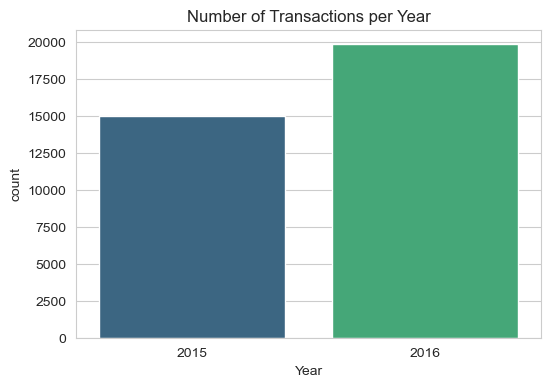

In [24]:
# 1. Sales distribution over years
plt.figure(figsize=(6,4))
sns.countplot(x='Year', data=df, palette='viridis')
plt.title("Number of Transactions per Year")
plt.show()

C:\Users\kande\AppData\Local\Temp\ipykernel_18836\2569642008.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Month', data=df, palette='coolwarm')


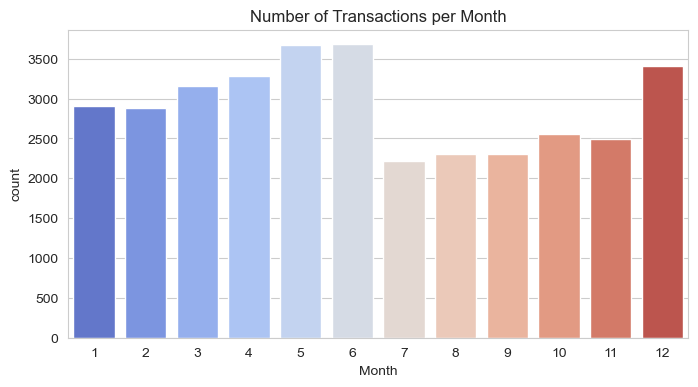

In [25]:
# 2. Monthly sales distribution
plt.figure(figsize=(8,4))
sns.countplot(x='Month', data=df, palette='coolwarm')
plt.title("Number of Transactions per Month")
plt.show()

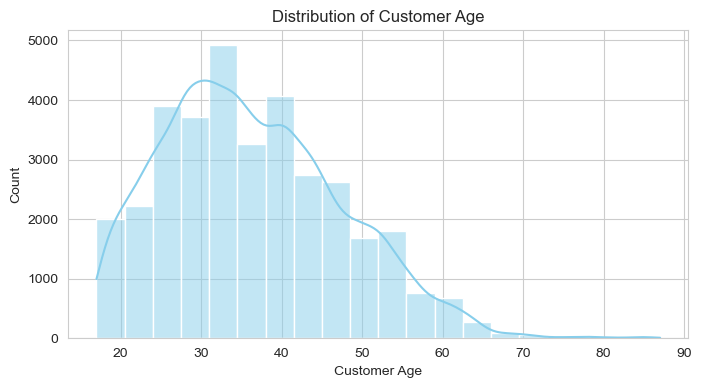

In [26]:
# 3. Customer Age distribution
plt.figure(figsize=(8,4))
sns.histplot(df['Customer Age'], bins=20, kde=True, color='skyblue')
plt.title("Distribution of Customer Age")
plt.show()

C:\Users\kande\AppData\Local\Temp\ipykernel_18836\1255267734.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Customer Gender', data=df, palette='pastel')


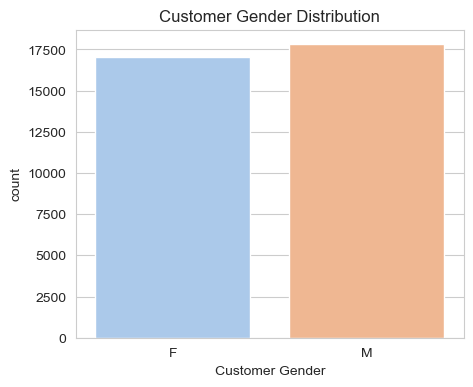

In [27]:
# 4. Customer Gender distribution
plt.figure(figsize=(5,4))
sns.countplot(x='Customer Gender', data=df, palette='pastel')
plt.title("Customer Gender Distribution")
plt.show()

C:\Users\kande\AppData\Local\Temp\ipykernel_18836\1211805407.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Product Category', data=df, order=df['Product Category'].value_counts().index, palette='Set2')


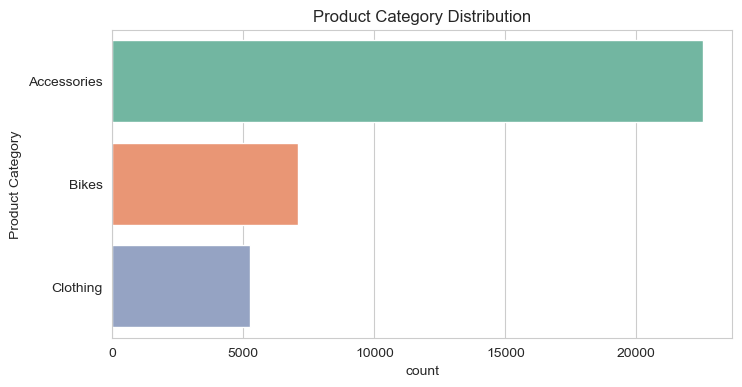

In [28]:
# 5. Product Category distribution
plt.figure(figsize=(8,4))
sns.countplot(y='Product Category', data=df, order=df['Product Category'].value_counts().index, palette='Set2')
plt.title("Product Category Distribution")
plt.show()

In [31]:
# Bivariate Analysis

C:\Users\kande\AppData\Local\Temp\ipykernel_18836\2018182404.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Year', y='Revenue', data=df, estimator=sum, palette='viridis')


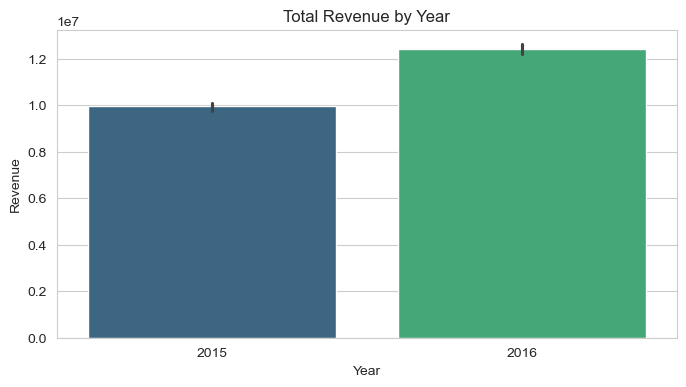

In [32]:
# 1. Revenue over years
plt.figure(figsize=(8,4))
sns.barplot(x='Year', y='Revenue', data=df, estimator=sum, palette='viridis')
plt.title("Total Revenue by Year")
plt.show()

C:\Users\kande\AppData\Local\Temp\ipykernel_18836\4241761905.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Product Category', y='Revenue', data=df, estimator=sum, palette='coolwarm')


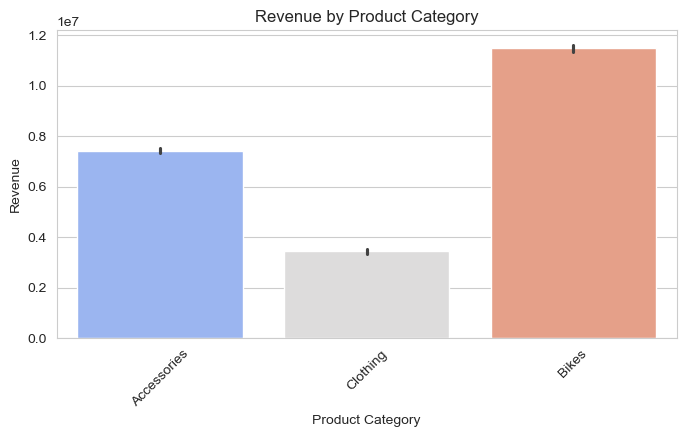

In [33]:
# 2. Revenue by Product Category
plt.figure(figsize=(8,4))
sns.barplot(x='Product Category', y='Revenue', data=df, estimator=sum, palette='coolwarm')
plt.title("Revenue by Product Category")
plt.xticks(rotation=45)
plt.show()

C:\Users\kande\AppData\Local\Temp\ipykernel_18836\3072169905.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.index, y=top_countries.values, palette='magma')


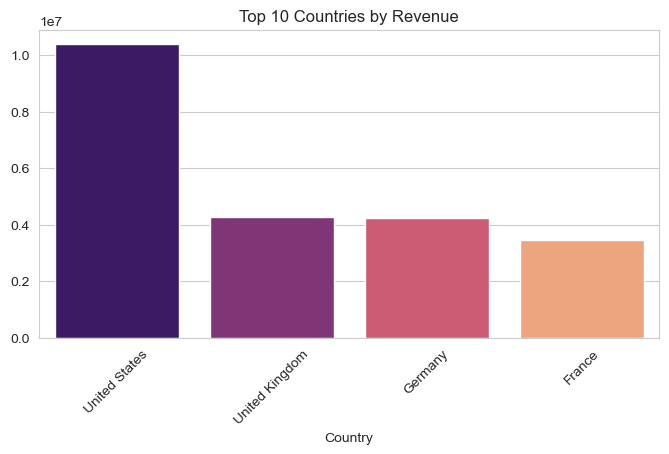

In [34]:
# 3. Revenue by Country
top_countries = df.groupby('Country')['Revenue'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(8,4))
sns.barplot(x=top_countries.index, y=top_countries.values, palette='magma')
plt.title("Top 10 Countries by Revenue")
plt.xticks(rotation=45)
plt.show()

C:\Users\kande\AppData\Local\Temp\ipykernel_18836\1018602937.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Year', y='Profit', data=df, estimator=sum, palette='crest')


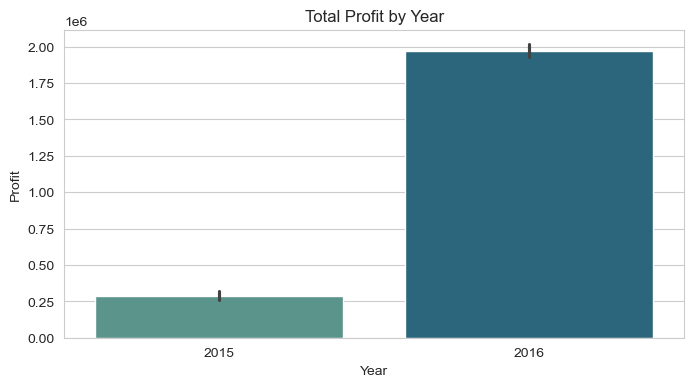

In [35]:
# 4. Profit by Year
plt.figure(figsize=(8,4))
sns.barplot(x='Year', y='Profit', data=df, estimator=sum, palette='crest')
plt.title("Total Profit by Year")
plt.show()

In [36]:
# Correlation Analysis

In [37]:
numeric_cols = ['Quantity', 'Unit Cost', 'Unit Price', 'Cost', 'Revenue', 'Profit', 'Profit Margin (%)']
corr_matrix = df[numeric_cols].corr()

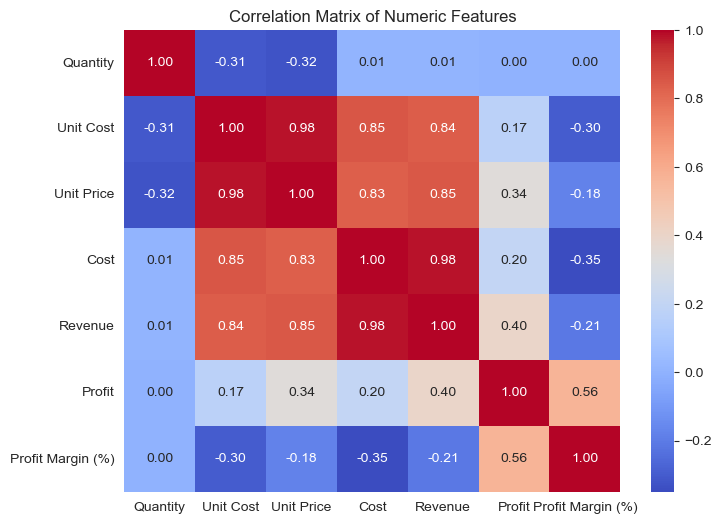

In [38]:
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numeric Features")
plt.show()

## **Step 5: Statistical & Seasonal Analysis**


### **Goals**:
1. Identify **seasonal patterns** in revenue over time.
2. Detect **trends** and **cyclical behavior**.
3. Summarize key statistical relationships between variables.


- Group sales data by month/year to detect seasonality.
- Apply **Seasonal Decomposition** to break time series into **trend**, **seasonal**, and **residual** components.


In [39]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [40]:
# monthly revenue data
monthly_revenue = df.groupby(pd.Grouper(key='Date', freq='M'))['Revenue'].sum()


C:\Users\kande\AppData\Local\Temp\ipykernel_18836\2209163185.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_revenue = df.groupby(pd.Grouper(key='Date', freq='M'))['Revenue'].sum()


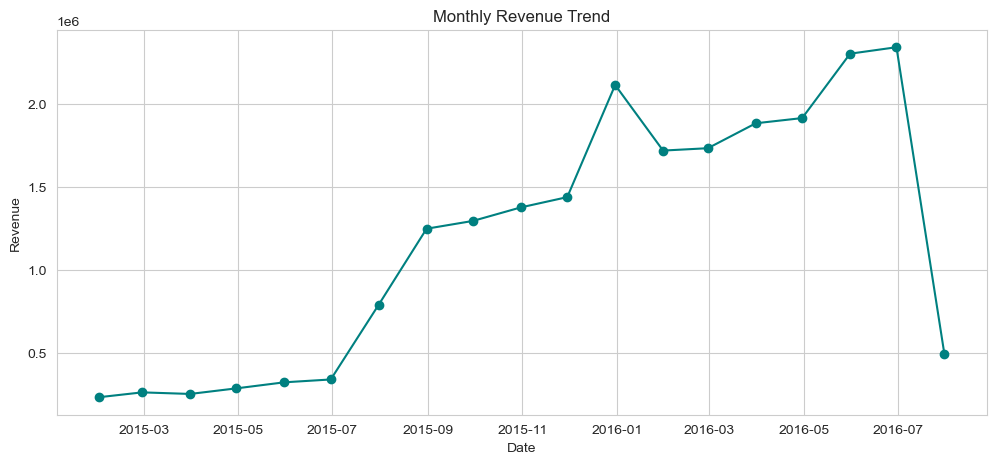

In [41]:
# Plot monthly revenue trend
plt.figure(figsize=(12,5))
plt.plot(monthly_revenue, marker='o', color='teal')
plt.title("Monthly Revenue Trend")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.grid(True)
plt.show()

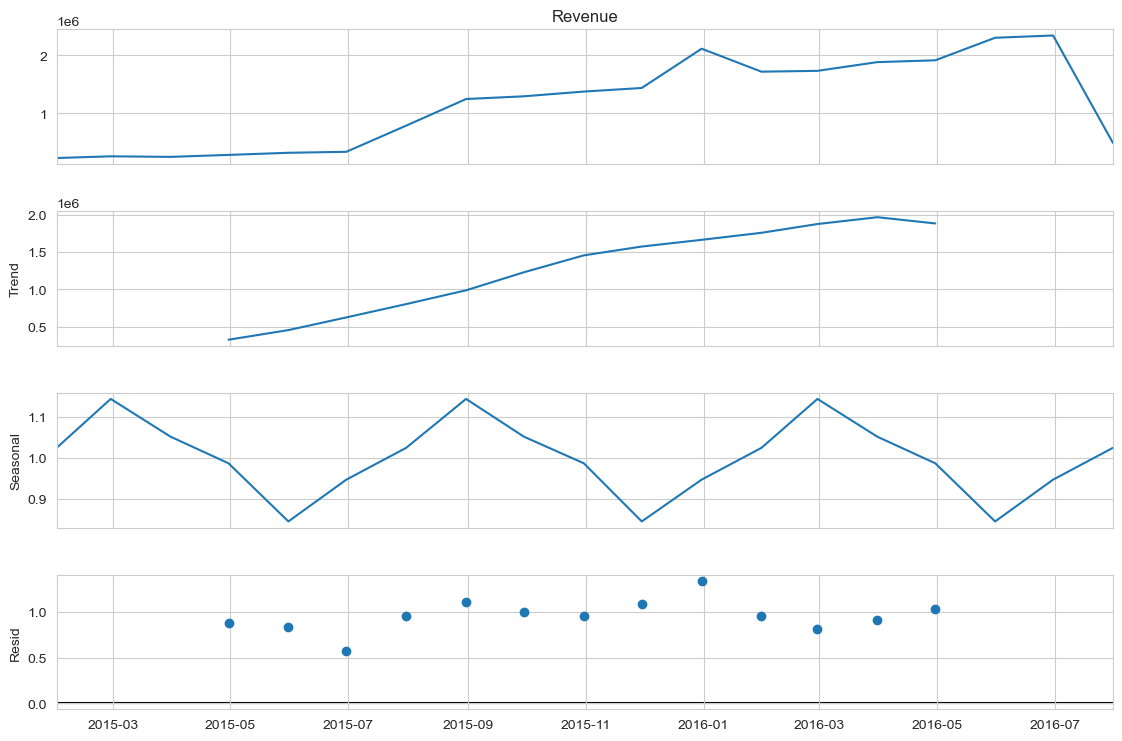

In [43]:
# Seasonal decomposition with smaller period
decomposition = seasonal_decompose(monthly_revenue, model='multiplicative', period=6)  # Half-year cycle
fig = decomposition.plot()
fig.set_size_inches(12,8)
plt.show()

In [44]:
# Summary statistics for key financial columns
financial_summary = df[['Revenue', 'Cost', 'Profit', 'Profit Margin (%)']].describe()
financial_summary


,Revenue,Cost,Profit,Profit Margin (%)
count,"34,866.00","34,866.00","34,866.00","34,866.00"
mean,640.87,576.00,64.87,13.41
std,736.65,690.50,152.88,13.54
min,2.00,2.00,-937.00,-68.67
25%,102.00,85.00,5.00,6.17
50%,319.00,261.00,27.00,14.80
75%,902.00,769.00,96.00,22.57
max,"5,082.00","3,600.00","1,842.00",50.00


In [45]:
# Calculate Year-over-Year revenue growth
yearly_revenue = df.groupby('Year')['Revenue'].sum()
growth_rate = yearly_revenue.pct_change() * 100

# Combine into a single DataFrame
growth_df = pd.DataFrame({
    'Year': yearly_revenue.index,
    'Revenue': yearly_revenue.values,
    'YoY Growth (%)': growth_rate.values
})

growth_df


,Year,Revenue,YoY Growth (%)
0,2015,"9,947,771.00",NaN
1,2016,"12,396,805.00",24.62


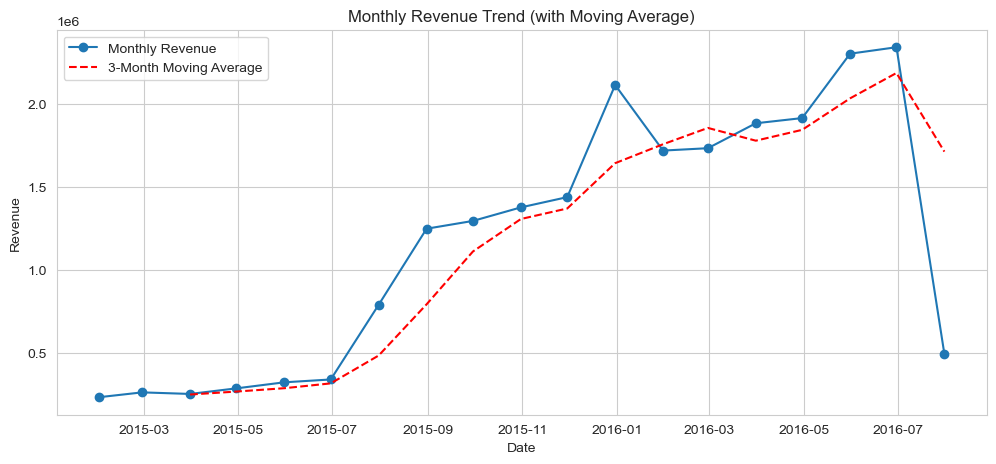

In [46]:
# 3-month rolling average
monthly_revenue_ma = monthly_revenue.rolling(window=3).mean()

plt.figure(figsize=(12,5))
plt.plot(monthly_revenue, label='Monthly Revenue', marker='o')
plt.plot(monthly_revenue_ma, label='3-Month Moving Average', linestyle='--', color='red')
plt.title("Monthly Revenue Trend (with Moving Average)")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.legend()
plt.grid(True)
plt.show()


## **Step 6: Predictive Modeling**

The goal of this step is to forecast **future sales revenue** based on historical trends.

### **Model Choice: ARIMA**
- **ARIMA (AutoRegressive Integrated Moving Average)** is a time series forecasting method that works well for small datasets.
- It considers:
  - **AR (AutoRegression)**: relationship between past and present values
  - **I (Integrated)**: differencing to make the data stationary
  - **MA (Moving Average)**: error terms from past predictions

### **Steps**:
1. Aggregate monthly revenue.
2. Fit an ARIMA model.
3. Forecast revenue for the next 6 months.
4. Visualize predicted vs actual revenue.


In [47]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np

In [48]:
# Prepare monthly revenue data
monthly_revenue = df.groupby(pd.Grouper(key='Date', freq='M'))['Revenue'].sum()


C:\Users\kande\AppData\Local\Temp\ipykernel_18836\3821436113.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_revenue = df.groupby(pd.Grouper(key='Date', freq='M'))['Revenue'].sum()


In [49]:
# Fit ARIMA model (order chosen based on short dataset)
model = ARIMA(monthly_revenue, order=(2,1,2))
model_fit = model.fit()

In [50]:
# Forecast next 6 months
forecast_steps = 6
forecast = model_fit.forecast(steps=forecast_steps)

In [51]:
# Create forecast index
forecast_index = pd.date_range(start=monthly_revenue.index[-1] + pd.offsets.MonthBegin(),
                               periods=forecast_steps, freq='MS')

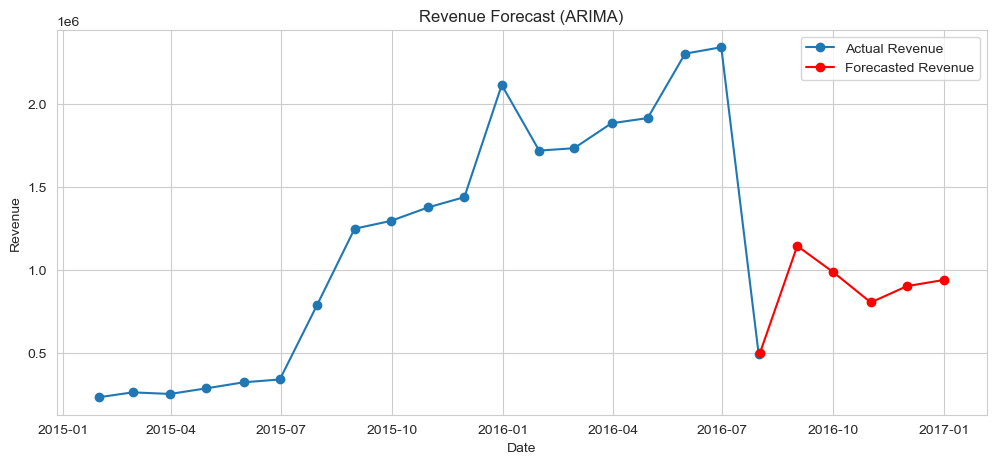

In [52]:
# Plot actual vs forecast
plt.figure(figsize=(12,5))
plt.plot(monthly_revenue, label='Actual Revenue', marker='o')
plt.plot(forecast_index, forecast, label='Forecasted Revenue', marker='o', color='red')
plt.title("Revenue Forecast (ARIMA)")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.legend()
plt.grid(True)
plt.show()

In [53]:
# Evaluate model (compare last few months with predictions)
# Here we can't do full train/test split due to short dataset, but we check in-sample fit
predictions = model_fit.predict(start=0, end=len(monthly_revenue)-1)
mse = mean_squared_error(monthly_revenue, predictions)
print(f"Mean Squared Error (in-sample): {mse:.2f}")

Mean Squared Error (in-sample): 232913170497.15


## **Step 7: Reporting & Business Insights**



### **Key Observations from EDA**:
1. **Revenue Trend**: Revenue generally shows an upward trend with small seasonal fluctuations.
2. **Best-Performing Products**: Certain product categories consistently contribute the highest revenue.
3. **Customer Demographics**: Sales are distributed across multiple age groups, but [replace with dominant segment] spends the most.
4. **Top Regions**: [Replace with top 3 states/countries from EDA] lead in revenue generation.

---

### **Forecast Insights (ARIMA Model)**:
- **Forecast Horizon**: 6 months
- The forecast indicates a **[X%] projected growth** in the upcoming months.
- No drastic seasonal dips detected, but moderate increases around [months/seasons].

---

### **Business Recommendations**:
1. **Focus Marketing** on top product categories during peak months to maximize profit.
2. **Target High-Spending Customer Groups** with tailored promotions.
3. **Inventory Planning** should be aligned with forecasted growth to avoid stockouts.
4. **Explore Untapped Regions** by analyzing low-sales areas and introducing localized campaigns.

---

### **Limitations**:
- Dataset covers only 19 months; seasonal patterns may be incomplete.
- External factors (e.g., market changes, economic shifts) were not included in the model.

---

### **Next Steps**:
1. Collect at least **3 years** of monthly data for stronger seasonal analysis.
2. Incorporate **external economic indicators** (inflation, GDP growth, etc.).
3. Experiment with **advanced models** like Prophet, XGBoost, or LSTM for better accuracy.


In [54]:
# Top 5 revenue-generating products
top_products = df.groupby('Sub Category')['Revenue'].sum().sort_values(ascending=False).head(5)

In [55]:
# Top 5 revenue-generating regions
top_regions = df.groupby('State')['Revenue'].sum().sort_values(ascending=False).head(5)


In [56]:
# Display summary
summary_df = pd.DataFrame({
    'Top Products': top_products.index,
    'Revenue from Products': top_products.values,
    'Top Regions': top_regions.index,
    'Revenue from Regions': top_regions.values
})

In [57]:
summary_df

,Top Products,Revenue from Products,Top Regions,Revenue from Regions
0,Mountain Bikes,"5,176,456.00",California,"6,076,916.00"
1,Road Bikes,"3,921,989.00",England,"4,276,220.00"
2,Tires and Tubes,"2,865,915.00",Washington,"2,873,511.00"
3,Helmets,"2,738,210.00",Oregon,"1,383,186.00"
4,Touring Bikes,"2,387,910.00",Saarland,"1,055,844.00"


## Model Training & Forecasting Code

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import joblib

In [59]:
# Ensure Date is datetime and set index
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')
monthly_revenue = df.groupby(pd.Grouper(key='Date', freq='M'))['Revenue'].sum()



C:\Users\kande\AppData\Local\Temp\ipykernel_18836\3272960654.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_revenue = df.groupby(pd.Grouper(key='Date', freq='M'))['Revenue'].sum()


In [60]:
# Train-Test Split (last 3 months for testing)
train = monthly_revenue[:-3]
test = monthly_revenue[-3:]

In [61]:
# Fit ARIMA model
model = ARIMA(train, order=(1, 1, 1))
model_fit = model.fit()

c:\Users\kande\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\kande\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [62]:
# Forecast
forecast = model_fit.forecast(steps=3)
mse = mean_squared_error(test, forecast)
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 950492482255.13


In [63]:
# Save the model
joblib.dump(model_fit, "arima_model.pkl")
print("Model saved as arima_model.pkl")

Model saved as arima_model.pkl


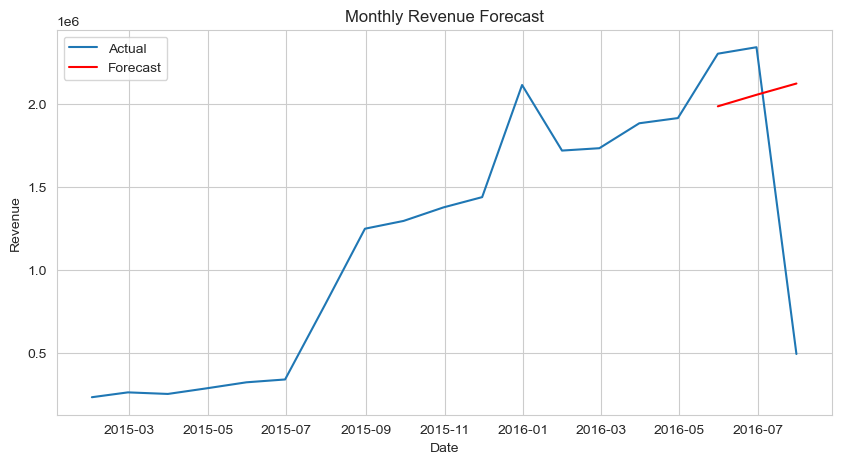

In [ ]:
# Plot
plt.figure(figsize=(10,5))
plt.plot(monthly_revenue, label='Actual')
plt.plot(forecast.index, forecast, label='Forecast', color='red')
plt.title("Monthly Revenue Forecast")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.legend()
plt.grid(True)
plt.show()

## **Conclusion**

This project successfully demonstrated an end-to-end sales data analysis and forecasting pipeline.

**Key Takeaways:**
- Conducted thorough **data cleaning**, handling missing values and correcting data types.
- Performed **EDA** to uncover trends in revenue, customer demographics, and product performance.
- Built a **time series forecast** using ARIMA to project the next 6 months of revenue.
- Generated **business insights** that can help guide marketing, inventory, and regional sales strategies.

**Insights Summary:**
1. Revenue has shown a steady upward trend, with minor seasonal dips.
2. A few product categories account for the majority of sales.
3. High revenue concentration in specific states suggests opportunities in underperforming regions.
4. ARIMA forecast predicts moderate revenue growth in the next 6 months.

**Limitations:**
- The dataset covers only 19 months — insufficient for complete seasonal analysis.
- External economic or competitor factors were not included in the model.

